In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv("E:\Dipti\python\AirPassengers.csv")
data.head()
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [3]:
data.describe

<bound method NDFrame.describe of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
5    1949-06          135
6    1949-07          148
7    1949-08          148
8    1949-09          136
9    1949-10          119
10   1949-11          104
11   1949-12          118
12   1950-01          115
13   1950-02          126
14   1950-03          141
15   1950-04          135
16   1950-05          125
17   1950-06          149
18   1950-07          170
19   1950-08          170
20   1950-09          158
21   1950-10          133
22   1950-11          114
23   1950-12          140
24   1951-01          145
25   1951-02          150
26   1951-03          178
27   1951-04          163
28   1951-05          172
29   1951-06          178
..       ...          ...
114  1958-07          491
115  1958-08          505
116  1958-09          404
117  1958-10          359
118  1958-11          310
119 

In [4]:
data.shape

(144, 2)

In [5]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#one variable is in the object format lets convert it into int that is month
#pandas can inderstand date format in YYYY-MM-DD HH:MM:SS

dateparse = lambda date: pd.datetime.strptime(date, '%Y-%m')

In [7]:
data = pd.read_csv("E:\Dipti\python\AirPassengers.csv", parse_dates = ['Month'],index_col = 'Month',date_parser=dateparse)

In [8]:
data.head()
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
data.dtypes

#Passengers    int64
dtype: object

In [10]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
ts = data['#Passengers']

In [12]:
ts.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [13]:
#Specify the entire range:
ts['1949-01-01':'1949-05-01']

# Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
ts['1949']
ts.tail(10)
ts.shape

(144,)

C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


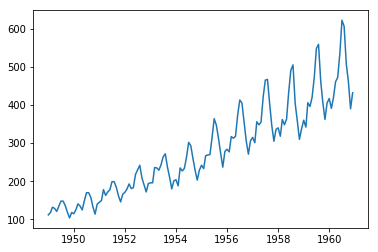

In [15]:
#check whether data is stationary or non-stationary
#data is stationary when it has constant mean, variance & covariance. most of Time series model are work on stationary data
#if the time series has very high probability overtime there is chances to follow the same in future.
#we can check with two test whether data is stationary or not
#1. rolling statistics - plot moving avg & variance with time, check if its varies with time
#2. dicky fuller test - test statistic is less than critical value we can reject the null hypothesis and say stationary dataset.
plt.plot(ts)

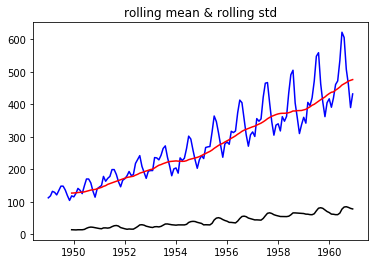

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
#perform dickyfuller test & rolling test

from statsmodels.tsa.stattools import adfuller

#rolling test

def stationary_test(timeseries):
    
    rollmean = timeseries.rolling(12).mean()#here we using window= 12 for month, becuase our dataset is in the monthly format
    rollstd = timeseries.rolling(12).std()
    
    orig = plt.plot(timeseries, color = 'blue', label = 'original data')
    mean = plt.plot(rollmean, color = 'red', label = 'mean of data')
    std = plt.plot(rollstd, color = 'black', label = 'standard deviation of data')
    plt.title('rolling mean & rolling std')
    plt.show()
        
#perform dicky fuller test

    DFtest = adfuller(timeseries, autolag = "AIC")
    DFoutput = pd.Series(DFtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in DFtest[4].items():
        DFoutput['Critical Value (%s)'%key] = value
    print(DFoutput)
    

stationary_test(ts)

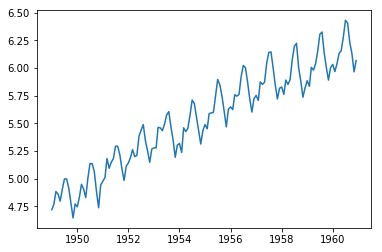

In [17]:
#our mean of data is varies with time that indicates data is not stationary. so lets move towards to make data stationary
#to perform further operations for that we have to reduce the trend as we can see our data is upward trending.
#to reduce trend we should have to perform log transformation.(we can take log/square root/cube to change trend)


ts_log = np.log(ts)

plt.plot(ts_log)



#here easily recognized the trend, so we use some other techniques and remove trend from series 

#1. Aveage - take avg of each time period
#2. smoothing - taking rolling averages
#3. polynomial fitting  - fit regression model

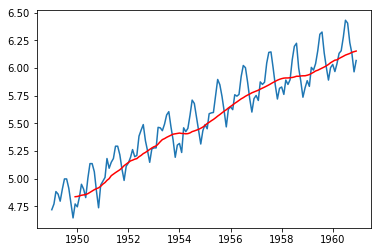

In [18]:
#lets do smoothing technique here, plot the moving averages

rollavg = ts_log.rolling(12).mean()

plt.plot(ts_log)
plt.plot(rollavg, color='red',label='moving average')

In [19]:
#lets substract moving avg from original values

moving_sub_value = ts_log - rollavg

moving_sub_value.head(13)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
Name: #Passengers, dtype: float64

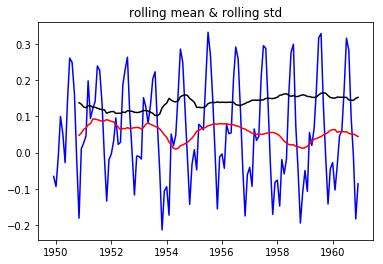

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [20]:
#here first 11 values are nan so lets remove this from data and plot the graph.

moving_sub_value.dropna(inplace=True)

stationary_test(moving_sub_value)

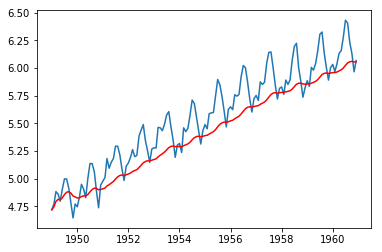

In [28]:
#exponentially weighted moving average

ewma = pd.Series.ewm

expwighted_avg = ewma(ts_log,halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

#parameter ‘halflife’ is used to define the amount of exponential decay. 
#This is just an assumption here and would depend largely on the business domain.

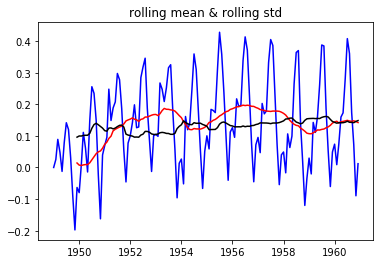

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [32]:
#same has been substarct from original data and plot a data

ts_log_ewma_diff = ts_log - expwighted_avg
stationary_test(ts_log_ewma_diff)



#here it gives better result than previous lesser variatin in mean & std

In [36]:
#now lets work with the seasonality

#The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones 
#with high seasonality. Lets discuss two ways of removing trend and seasonality:

#Differencing – taking the differece with a particular time lag
#Decomposition – modeling both trend and seasonality and removing them from the model.

#Differencing
#One of the most common methods of dealing with both trend and seasonality is differencing.
#In this technique, we take the difference of the observation at a particular instant with that at
#the previous instant.

ts_log.shift().head()

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
Name: #Passengers, dtype: float64

In [38]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

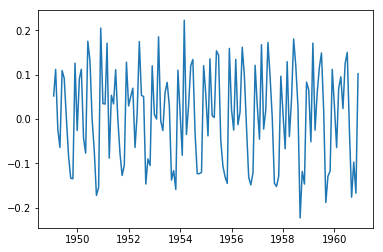

In [41]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

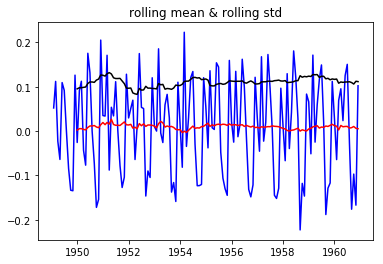

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [46]:
ts_log_diff.dropna(inplace=True)
stationary_test(ts_log_diff)

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

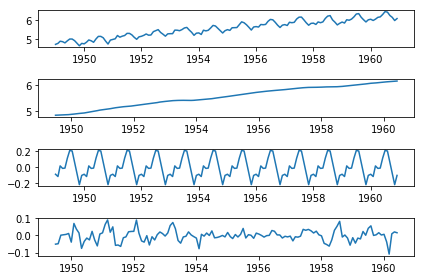

In [54]:
plt.subplot(411)
plt.plot(ts_log, label='original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.subplot(414)
plt.plot(residual, label='residual')

plt.tight_layout()

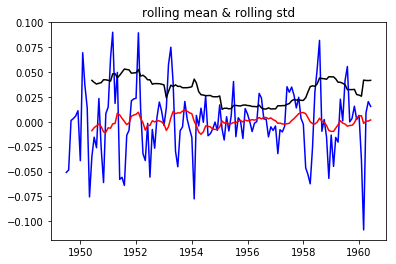

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [57]:
#lets check stationarity with residual


residual.dropna(inplace=True)
stationary_test(residual)

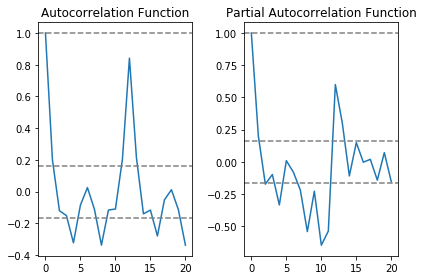

In [68]:
#here we make the model
#forcast the time series model. one of the model which ARIMA to use to create a model
#here three parameters we need to consider i.e p, q & d
#p = Autoregressive terms(lags of depedent variable)
#q = moving average
#d = number of difference in data

#to find out value of p & q we use ACF (autocorelation function) & PACF (partial autocorrelation function)

from statsmodels.tsa.stattools import acf, pacf

acf = acf(ts_log_diff, nlags =20)
pacf = pacf(ts_log_diff, nlags =20, method = 'ols')


plt.subplot(121)
plt.plot(acf)
plt.axhline(y=1,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=1,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

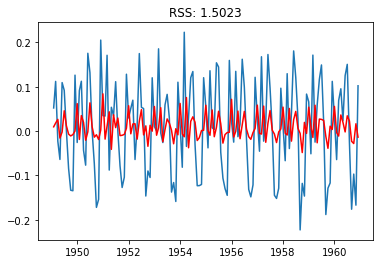

In [70]:
#here use ARIMA model

from statsmodels.tsa.arima_model import ARIMA



##AR MODEL #####
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

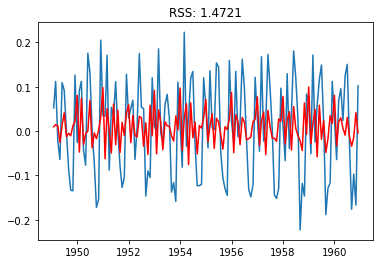

In [72]:
### MA MODEL ##

model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

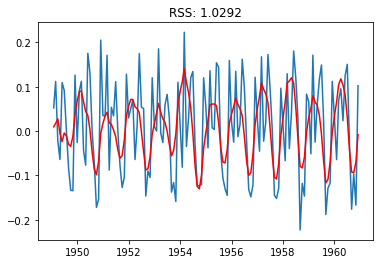

In [74]:
### combined model ###

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [79]:
### predict the value

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [82]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [83]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Win 10\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1045')

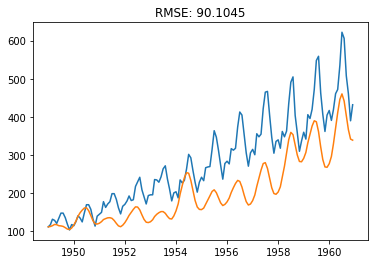

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))